In [30]:
import qrcode
import numpy as np
from matplotlib import pyplot as plt
import random
import string

In [31]:
CMAP = 'magma'

def create_code():
  s = ''.join(random.choices(string.ascii_lowercase, k=14))
  pil_img = qrcode.make(s, box_size=1, border=0,)
  np_img = np.array(pil_img.getdata()).reshape(pil_img.size[0], pil_img.size[1], 1)
  np_array = np.concatenate(np.concatenate(np_img))//255
  return np_array

def reshape_code(qr):
  s = int((qr.shape[0])**0.5)
  return qr.reshape(s, s)

def show_code(qr):
  fig, ax = plt.subplots(1, 1, figsize=(4, 4))
  plt.setp(ax, xticklabels=[], yticklabels=[])
  ax.axis("off")
  plt.imshow(reshape_code(qr), cmap=CMAP)

def crash_code(qr, alpha):
  for i in range(qr.shape[0]):
    if random.random() <= alpha:
      qr[i] = int(not qr[i])
  return qr

def plot_codes(X, y_true=None, y_pred=None):
  fig, ax = plt.subplots(1, X.shape[0], figsize=(3*X.shape[0], 2))
  plt.setp(ax, xticklabels=[], yticklabels=[])

  line = 'b'
  lw = 4

  for i in range(X.shape[0]):
    title = ""
    if y_true is not None:
      title += f"Real: {bool(y_true[i])}\n"
    if y_pred is not None:
      title += f"Predict: {bool(int(y_pred[i]))}"
    ax[i].axis("off")
    ax[i].title.set_text(title)
    ax[i].title.set_size(25)
    ax[i].imshow(reshape_code(X[i, :]), cmap=CMAP)

def shuffle(X, y):
  n = len(y)
  a = [(random.random(), X[i, :], y[i]) for i in range(n)]
  a.sort()
  new_X = np.array([a[i][1] for i in range(n)])
  new_y = np.array([a[i][2] for i in range(n)])
  return new_X, new_y

Создадим 5 qr-кодов

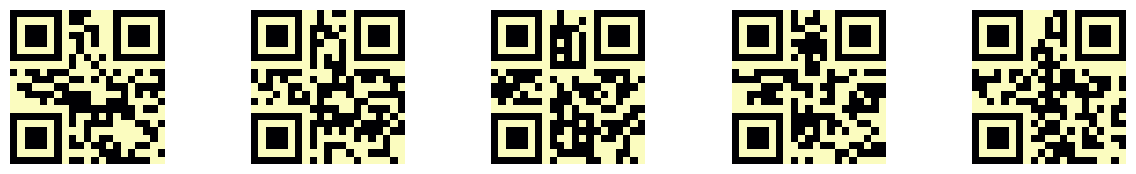

In [32]:
n = 5
X = np.array([create_code() for i in range(n)])
plot_codes(X)

Создадим 5 изображений, которые притворяются правильными qr-кодами

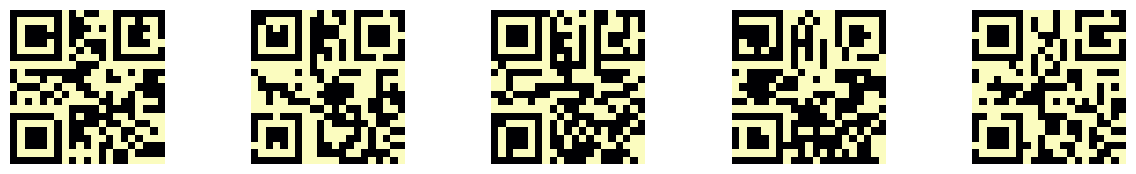

In [33]:
n = 5
X = np.array([crash_code(create_code(), 0.075) for i in range(n)])
plot_codes(X)

Формируем датасет

In [34]:
n = 10
X = np.array([crash_code(create_code(), 0.075) for i in range(6)] +
             [[0]*441, [1]*441,
              [random.randint(0, 1) for i in range(441)],
              [random.randint(0, 1) for i in range(441)]] +
              [create_code() for i in range(n)])
y = np.array([0]*n + [1]*n)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
X_, y_ = shuffle(X, y)
y_

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

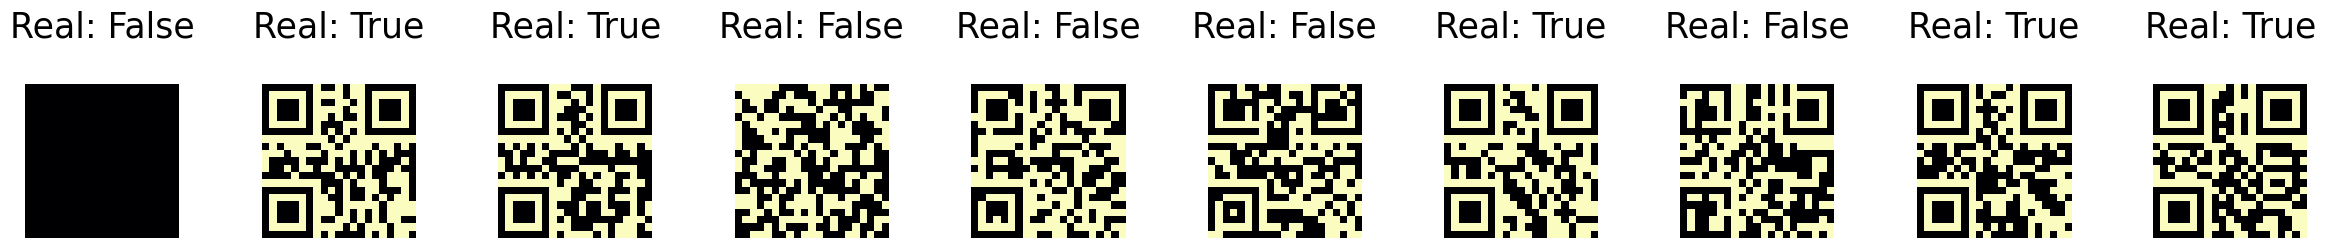

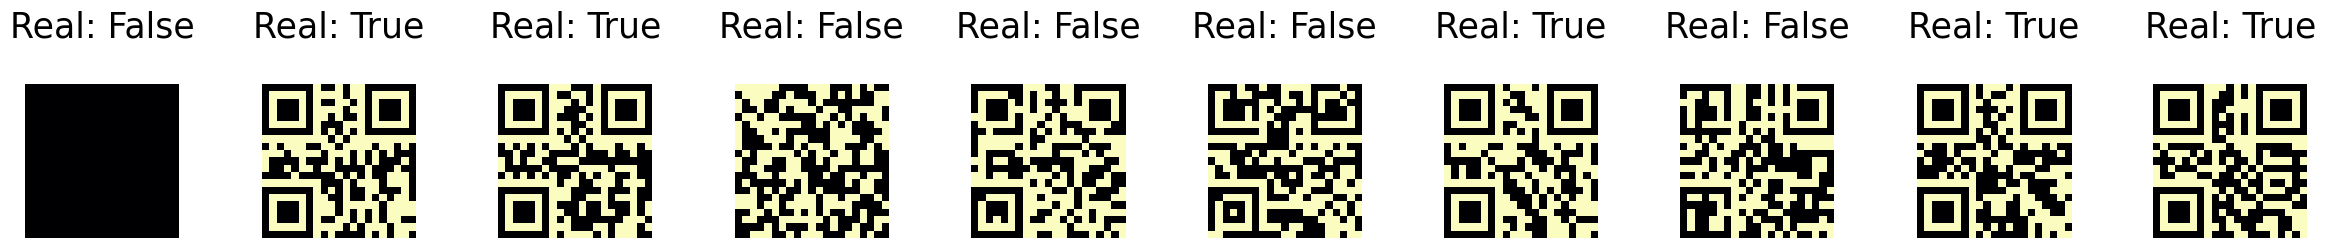

In [36]:
plot_codes(X_[:10, :], y_true=y_[:10])
plot_codes(X_[:-10, :], y_true=y_[:-10])

In [140]:
class Perceptron:
  def __init__(self, hidden_layers, activations, eta=1, n_epochs=100):
    self.layers = []
    self.epochs = n_epochs
    self.eta = eta
    self.errors = []
    l = hidden_layers + [1]
    for i in range(len(hidden_layers)):
      self.layers.append(Layer((l[i], l[i + 1] + 1), activations[i], i + 1))


  def predict(self, X, logging=False):
    result = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
      x = X[i, :]
      for layer in self.layers:
        x = np.append(x, values=[1])
        print(x)# bias
        x = layer.forward(x, logging)
        print(x)
      result[i] = x[0]
      if logging:
        print(result[i])
    return result

  def train(self, X, y, logging=False):
      self.layers = [Layer((self.layers[0].size[0], X.shape[1] + 1, ), np.sign, 0)] + self.layers
      ans = self.predict(X,logging)
      for _ in range(self.epochs):
          error = 0
          for i in range(y):
              delta = y[i] - ans[i]
              error += delta
              for j in range(len(self.layers)):
                  self.layers[j].backward(self.eta*np.sign(y[i] != ans[i]))
          self.errors.append(error)
      return self.errors




class Layer:
  def __init__(self, size, activation, index, value=0):
    self.size = size
    self.w = np.full(size, value)
    self.activation = np.vectorize(activation)
    self.i = index

  def backward(self, x):
      self.w = self.w + x

  def forward(self, x, logging):
    m = np.dot(x.T, self.w.T)
    print(m)
    print(self.w)
    result = self.activation(m)

    if logging:
      print(f"Слой №{self.i+1}")
      print(f"Сенсоры  : {x}")
      print(f"Сумматор : {m}")
      print(f"Активация: {result}")

    return result

In [141]:
pcp = Perceptron([3, 3, 3], [np.sign]*3)

In [142]:
pcp.train(X_, y_, logging=True)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Слой №1
Сенсоры  : [1 1 1 1 1 1 1 1 1

ValueError: shapes (4,) and (2,3) not aligned: 4 (dim 0) != 2 (dim 0)